<a href="https://colab.research.google.com/github/smptbot142-lab/NM/blob/main/%D0%9B%D0%A0_5_%D0%A7%D0%9C_%D0%A1%D0%B8%D1%81_%D0%BC%D0%B8_%D0%BD%D0%B5%D0%BB%D1%96%D0%BD_%D1%80%D1%96%D0%B2%D0%BD%D1%8F%D0%BD%D1%8C_%D0%9C%D1%96%D0%BB%D0%B5%D0%B2%D1%81%D1%8C%D0%BA%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BA%D1%81%D0%B8%D0%BC_%D0%B25_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Був присутній на парі

#Лабораторна робота 5
Розв'язання систем нелінійних рівнянь.

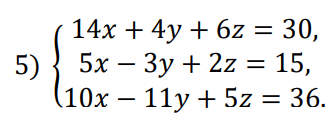

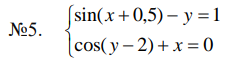

In [9]:
# Матриця А та вектор b
a = [[3,  0, 0,  7,  1],
     [9,  7, 9, -1,  4],
     [0,  2, 2,  0,  0],
     [5, -2, 5,  0,  6],
     [1,  9, 7,  8, -3]]
b = [7, -9, 6, 15, -7]

In [10]:

# Довжина списку
d = len(b)

# Прямий хід
for m in range(0,d-1):
    for j in range(m+1,d):
        k = a[j][m] / a[m][m]
        for i in range(m,d):
            a[j][i] = a[j][i] - k*a[m][i]
        b[j] = b[j] - k*b[m]

# Скалярний добуток
def scalar_product(a, b, n):
    s = 0
    for i in range(n+1, d):
        s = s + a[n][i]*b[i]
    return s

# Зворотний хід
for i in range(d-1, -1, -1):
    b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]

# Відображення результатів
print('Матриця А після перетворень прямого ходу')
for i in range(0,d):
    print(a[i])
print()
print("Вектор розв'язку x")
for i in range(0,d):
    print(b[i])

Матриця А після перетворень прямого ходу
[14  4  6]
[ 0 -4  0]
[0 0 0]

Вектор розв'язку x
[2]
[-1]
[-9223372036854775808]


/tmp/ipython-input-1344712080.py:21: RuntimeWarning: divide by zero encountered in divide
  b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]
/tmp/ipython-input-1344712080.py:21: RuntimeWarning: invalid value encountered in cast
  b[i] = (b[i] - scalar_product(a, b, i)) / a[i][i]


In [ ]:
import numpy as np
from numpy.linalg import solve

a = np.array([[3, 0, 0, 7, 1],
              [9, 7, 9,-1, 4],
              [0, 2, 2, 0, 0],
              [5,-2, 5, 0, 6],
              [1, 9, 7, 8,-3]])
b = np.array([7, -9, 6, 15, -7])

x = solve(a,b)

for i in range(len(x)):
    print(x[i])

In [ ]:
import sympy as sp

a = sp.Matrix([[3, 0, 0, 7, 1],
                 [9, 7, 9,-1, 4],
                 [0, 2, 2, 0, 0],
                 [5,-2, 5, 0, 6],
                 [1, 9, 7, 8,-3]])
b = sp.Matrix([7, -9, 6, 15, -7])

x = a.solve(b)

print(x)

In [ ]:
import sympy as sp

a11 = sp.symbols('a11')
a12 = sp.symbols('a12')
a21 = sp.symbols('a21')
a22 = sp.symbols('a22')
b1 = sp.symbols('b1')
b2 = sp.symbols('b2')

a = sp.Matrix([[a11, a12],
                 [a21, a22]])
b = sp.Matrix([b1, b2])
x = a.solve(b)

print(x)

In [2]:
import numpy as np

In [5]:
a = np.array([
    [14, 4, 6],
    [5, -3, 2],
    [10, -11, 5],
])
b = np.array([[30], [15], [36]])

In [7]:
# Напиши функцію для вирішення системи методом Гауса
def solve_gausse(a, b, verbose=False):
    det = np.linalg.det(a)
    if verbose: print(f"Визначник матриці A: {round(det)}")
    if det == 0:
        print("Визначник дорівнює нулю - розв'язків немає")
        return None
    # Reading number of unknowns
    n = len(b)
    m = np.concatenate([a, b], axis=1, dtype=float)

    # Applying Gauss-Jordan Elimination
    for i in range(n):

        # Swap rows to avoid division by 0
        if m[i, i] == 0:
            for k in range(i+1, n):
                if m[k, k] != 0:
                    m[[i, k], :] = m[[k, i], :]
                    break


        if m[i, i] != 1:
            m[i, :] *= 1/m[i, i]

        for j in range(n):
            if i != j:
                ratio = m[j][i]/m[i][i]

                m[j, :] = m[j, :] - ratio * m[i, :]

    return m[:, [-1]]

print(f"Вектор рішення: \r\n {solve_gausse(a, b)}")

Вектор рішення: 
 [[ 2.]
 [-1.]
 [ 1.]]


# **2 частина**

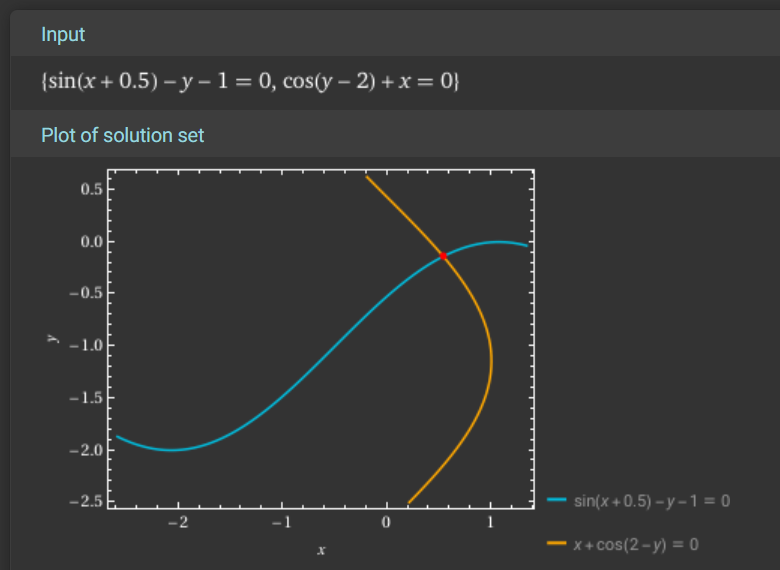

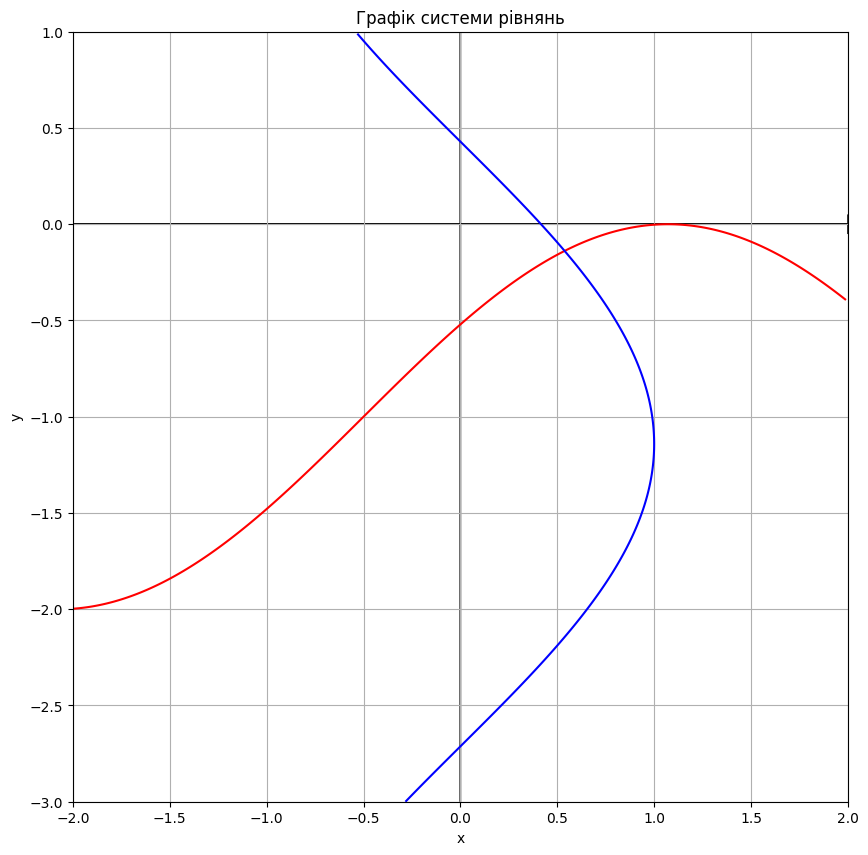

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Область значень для x та y
x_min, x_max = -2, 2
y_min, y_max = -3, 1
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(x + 0.5) - 1 - y
eq2 = x + np.cos(y-2)

# Створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')

# Додаємо стрілки на кінцях осей
ax.arrow(x_min, 0, x_max - x_min, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
ax.arrow(0, y_min, 0, y_max - y_min, head_width=0.1, head_length=0.2, fc='black', ec='black')

# Додаємо сітку
plt.grid(True)

# Показуємо графік
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
import numpy as np
from scipy import optimize

# початкове наближення
x0, y0 = 0.5, 0.0

# ітераційні функції
def f1(x):
    return np.sin(x) - 0.5

def f2(y):
    return np.cos(2*y)

# метод простої ітерації
def iter(x, y, e):
    xn, yn = x, y
    n = 0
    while True:
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
        if abs(xn1 - xn) < e and abs(yn1 - yn) < e:
            break
        xn, yn = xn1, yn1
    print('Simple iteration:')
    print('x =', xn1, '\ny =', yn1, '\nIterations =', n)

iter(x0, y0, 0.001)

# Перевірка розв'язку
def f3(vars):
    x, y = vars
    return [np.sin(x) - 0.5 - y, np.cos(2*y) - x]

s = optimize.root(f3, [0.5, 0.0], method='hybr')
print('Check:', s.x)


Simple iteration:
x = 0.8655863874924078 
y = 0.26147372186147677 
Iterations = 28
Check: [0.86604932 0.26177547]


Зверніть увагу!
#Відповіді мають співпасти.

